In [1]:
from re_eval_methods import *
from scipy.special import comb
from helper_functions import *
from rule_extractor_original.Lenses_dataset.Horn import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\sophi\Miniconda3\envs\MT\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Define the binarizer and its lookup.

In [2]:
country_file = 'data/country_list_continents_new.csv'
occ_file = 'data_new/occupations_subset.csv'
binarizer = Binarizer(country_file, 5, occ_file)

lookup = get_lookup(binarizer)

This cell saves the background to file.

In [3]:
dim = sum(binarizer.lengths.values()) + 2
V = define_variables(dim)

background = {(~(V[0] & V[1])),
(~(V[0] & V[2])),
(~(V[0] & V[3])),
(~(V[0] & V[4])),
(~(V[1] & V[2])),
(~(V[1] & V[3])),
(~(V[1] & V[4])),
(~(V[2] & V[3])),
(~(V[2] & V[4])),
(~(V[3] & V[4])),
(~(V[5] & V[6])),
(~(V[5] & V[7])),
(~(V[5] & V[8])),
(~(V[5] & V[9])),
(~(V[5] & V[10])),
(~(V[5] & V[11])),
(~(V[5] & V[12])),
(~(V[5] & V[13])),
(~(V[6] & V[7])),
(~(V[6] & V[8])),
(~(V[6] & V[9])),
(~(V[6] & V[10])),
(~(V[6] & V[11])),
(~(V[6] & V[12])),
(~(V[6] & V[13])),
(~(V[7] & V[8])),
(~(V[7] & V[9])),
(~(V[7] & V[10])),
(~(V[7] & V[11])),
(~(V[7] & V[12])),
(~(V[7] & V[13])),
(~(V[8] & V[9])),
(~(V[8] & V[10])),
(~(V[8] & V[11])),
(~(V[8] & V[12])),
(~(V[8] & V[13])),
(~(V[9] & V[10])),
(~(V[9] & V[11])),
(~(V[9] & V[12])),
(~(V[9] & V[13])),
(~(V[10] & V[11])),
(~(V[10] & V[12])),
(~(V[10] & V[13])),
(~(V[11] & V[12])),
(~(V[11] & V[13])),
(~(V[12] & V[13])),
(~(V[14] & V[15])),
(~(V[14] & V[16])),
(~(V[14] & V[17])),
(~(V[14] & V[18])),
(~(V[14] & V[19])),
(~(V[14] & V[20])),
(~(V[14] & V[21])),
(~(V[15] & V[16])),
(~(V[15] & V[17])),
(~(V[15] & V[18])),
(~(V[15] & V[19])),
(~(V[15] & V[20])),
(~(V[15] & V[21])),
(~(V[16] & V[17])),
(~(V[16] & V[18])),
(~(V[16] & V[19])),
(~(V[16] & V[20])),
(~(V[16] & V[21])),
(~(V[17] & V[18])),
(~(V[17] & V[19])),
(~(V[17] & V[20])),
(~(V[17] & V[21])),
(~(V[18] & V[19])),
(~(V[18] & V[20])),
(~(V[18] & V[21])),
(~(V[19] & V[20])),
(~(V[19] & V[21])),
(~(V[20] & V[21])),
(~(V[22] & V[23])),
}

with open('data_new/background.txt', 'wb') as f:
    pickle.dump(background, f)

# Single evaluation

In this section, one can evaluate a single experimental result by converting the rules and print them out. A single experimental result means, all runs of one experiment setup (10 for the lower EQ nubmers).

First, all rules from the file are loaded and converted into lists / dictionaries and concatenated into a list of all rules over all experiments.

In [4]:
""" Set the parameters for the desired experiment """

e = 10  # defines the number of experiments per setup
lm = 'bert-base-cased'
eq = 50

In [5]:
experiments = range(1,e+1)
background = load_background()
all_negations = []
all_implications = []
for ex in experiments:
    h = load_rules(lm, eq, ex)
    all_rules = get_all_rules(h, background)
    (rules, negations, implications) = make_rule_lists(all_rules)
    all_negations = [*all_negations, *negations]
    all_implications = [*all_implications, *implications]

Count the rules over all experiments and print them out. (This includes **all** implications).

In [6]:
negations_count = count_lists(all_negations)
implications_count = count_lists(all_implications)
print_all_counted_rules(negations_count, implications_count, lookup)

0.900  :  not (fashion_designer & male )
0.600  :  not (boxer & female )
0.600  :  not (footballer & female )
0.500  :  not (violinist & female )
0.400  :  not (industrialist & female )
0.300  :  not (between 1875 and 1925 & female )
0.200  :  not (singer & female )
0.200  :  not (female & North America )
0.100  :  not (nurse & male & Africa )
0.100  :  not (before 1875 & female )
0.100  :  not (nurse & male & North America )
0.100  :  not (Oceania & dancer & male )
0.100  :  not (before 1875 & female & South America )
0.100  :  not (before 1875 & Eurasia & singer & female )
0.100  :  not (dancer & male )
0.100  :  not (Americas & dancer & male & after 1970 )
0.100  :  not (Eurasia & boxer & female )
0.100  :  not (Eurasia & female )
0.100  :  not (Australia & dancer & between 1925 and 1951 & male )
0.100  :  not (Oceania & female )
0.100  :  not (before 1875 & Americas & dancer & male )
0.100  :  not (boxer & female & South America )
0.100  :  not (Eurasia & violinist & female )
0.100

Do the same, but exclude implications that are derived from a negation.

In [7]:
relevant_implications = []
for rule in all_implications:
    if rule['body'] not in all_negations:
        relevant_implications.append(rule)
relevant_implications_count = count_lists(relevant_implications)
print_all_counted_rules(negations_count, relevant_implications_count, lookup)

0.900  :  not (fashion_designer & male )
0.600  :  not (boxer & female )
0.600  :  not (footballer & female )
0.500  :  not (violinist & female )
0.400  :  not (industrialist & female )
0.300  :  not (between 1875 and 1925 & female )
0.200  :  not (singer & female )
0.200  :  not (female & North America )
0.100  :  not (nurse & male & Africa )
0.100  :  not (before 1875 & female )
0.100  :  not (nurse & male & North America )
0.100  :  not (Oceania & dancer & male )
0.100  :  not (before 1875 & female & South America )
0.100  :  not (before 1875 & Eurasia & singer & female )
0.100  :  not (dancer & male )
0.100  :  not (Americas & dancer & male & after 1970 )
0.100  :  not (Eurasia & boxer & female )
0.100  :  not (Eurasia & female )
0.100  :  not (Australia & dancer & between 1925 and 1951 & male )
0.100  :  not (Oceania & female )
0.100  :  not (before 1875 & Americas & dancer & male )
0.100  :  not (boxer & female & South America )
0.100  :  not (Eurasia & violinist & female )
0.100

# Single Runtime evaluation

Evaluates the runtime of a single experimental setup with its multiple runs (10 for up to 200 EQs).

In [8]:
""" Set the parameters for the desired experiment """

e = 10  # defines the number of experiments per setup
lm = 'bert-base-cased'
eq = 50

In [9]:
experiments = range(1,e+1)
total_runtime = 0
df = pd.DataFrame(columns=['samples', 'runtime', 'eq'])
for ex in experiments:
    data_dict = get_data_dict(lm, eq, ex)
    total_runtime = total_runtime + float(data_dict['data']['runtime'])
    sample_list = data_dict['data']['average_sample']
    sample_df = make_sample_df(sample_list)
    df = pd.concat([df, sample_df])
total_runtime = total_runtime / len(experiments)
print("{lm} - {e} EQs:".format(lm=lm, e=e))
print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))

bert-base-cased - 10 EQs:
	runtime average: 850.68 sec = 14.18 min = 0.24 h


Visualize the amount of samples per equivalence query and the average

In [10]:
sns.catplot(data=df, x='eq', y='samples', height=6, aspect=1.5)
sns.catplot(data=df.groupby('eq', as_index=False)['samples'].mean(), x='eq', y='samples', height=6, aspect=1.5)

ValueError: min() arg is an empty sequence

And do a similar visualization for the average runtime at each equivalence query.

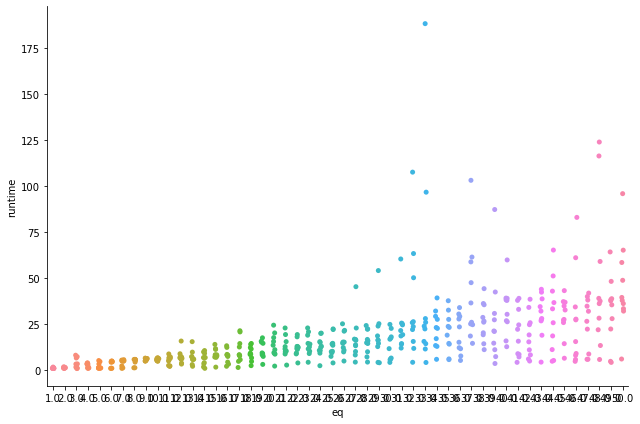

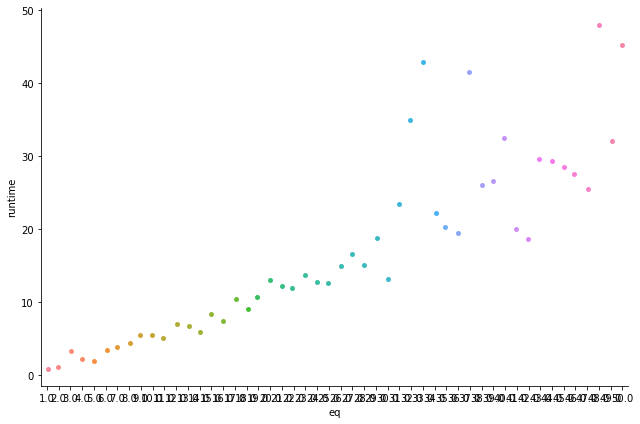

In [ ]:
sns.catplot(data=df, x='eq', y='runtime', height=6, aspect=1.5)
sns.catplot(data=df.groupby('eq', as_index=False)['runtime'].mean(), x='eq', y='runtime', height=6, aspect=1.5)

# Runtime Evaluation All

## Evaluate per model

In [3]:
eqs = [50, 100, 150, 200]
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
experiments = range(1,11)

In [4]:
runtimes_df = pd.DataFrame(columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])
frames = []
for lm in models:
    df = pd.DataFrame(columns=['samples', 'runtime', 'iteration', 'eq'])
    for eq in eqs:
        total_runtime = 0
        for ex in experiments:
            data_dict = get_data_dict(lm, eq, ex)
            total_runtime = total_runtime + float(data_dict['data']['runtime'])
            sample_list = data_dict['data']['average_sample']
            sample_df = make_sample_df(sample_list, eq=eq)
            df = pd.concat([df, sample_df], ignore_index=True)
        total_runtime = total_runtime / len(experiments)
        #print("{lm} - {e} EQs:".format(lm=lm, e=eq))
        #print("\truntime average: {r:.2f} sec = {r1:.2f} min = {r2:.2f} h".format(r=total_runtime, r1 = total_runtime/60, r2=total_runtime/60/60))
        runtime_arr = [[lm, eq, total_runtime, total_runtime / 60, total_runtime / 60 / 60]]
        runtimes_df = pd.concat([runtimes_df, pd.DataFrame(runtime_arr, columns=['lm', 'eq', 'runtime sec', 'runtime min', 'runtime h'])], ignore_index=True)
    frames.append(df)

In [5]:
print(runtimes_df)

                  lm   eq   runtime sec  runtime min  runtime h
0       roberta-base   50    858.259188    14.304320   0.238405
1       roberta-base  100   3554.849831    59.247497   0.987458
2       roberta-base  150  10236.754475   170.612575   2.843543
3       roberta-base  200  25382.745822   423.045764   7.050763
4      roberta-large   50   1008.739725    16.812329   0.280205
5      roberta-large  100   3640.298588    60.671643   1.011194
6      roberta-large  150   9690.581859   161.509698   2.691828
7      roberta-large  200  21694.119684   361.568661   6.026144
8    bert-base-cased   50    850.676991    14.177950   0.236299
9    bert-base-cased  100   3452.385012    57.539750   0.958996
10   bert-base-cased  150  10076.014450   167.933574   2.798893
11   bert-base-cased  200  20558.066469   342.634441   5.710574
12  bert-large-cased   50    930.304901    15.505082   0.258418
13  bert-large-cased  100   3787.647845    63.127464   1.052124
14  bert-large-cased  150  10301.129371 

### Plot the average sample per iteration for all models

In [6]:
models = models = ['roBERTa-base', 'roBERTa-large', 'BERT-base', 'BERT-large']


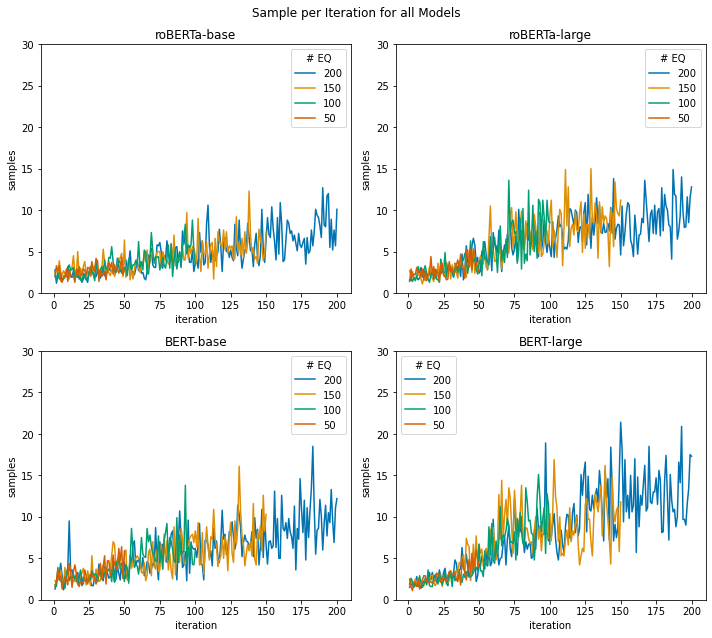

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['samples'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='samples', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 30])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Plot the average runtime per iteration for all models

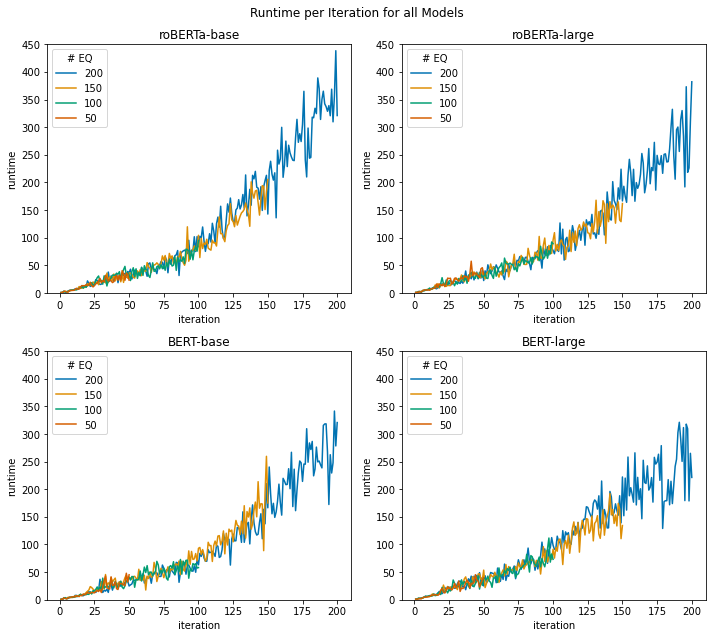

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Runtime per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 450])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

### Analyse the runtime per sample

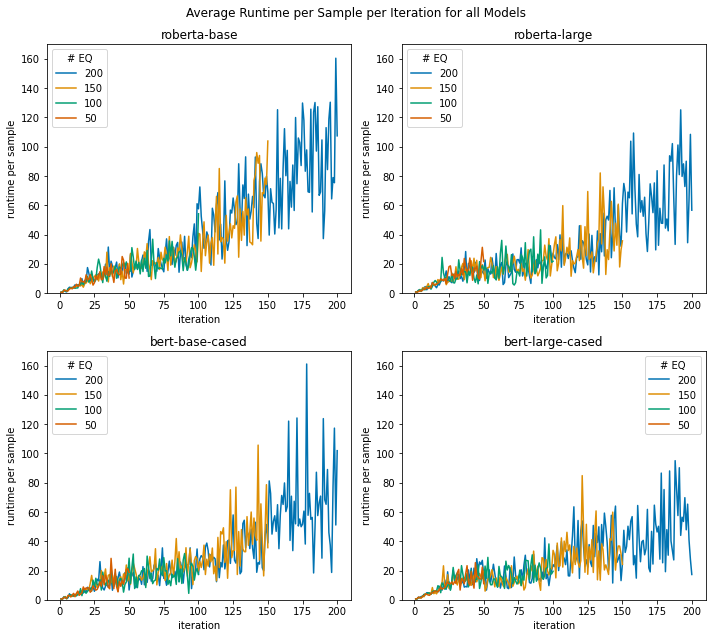

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
fig.suptitle('Average Runtime per Sample per Iteration for all Models')
for i, lm in enumerate(models):
    df = frames[i]
    df['runtime per sample'] = df['runtime'] / df['samples']
    data = df.groupby(['eq', 'iteration'], as_index=False)['runtime per sample'].mean()
    hue_order = [200, 150, 100, 50]
    sns.lineplot(ax=axes[int(i/2), i%2], data=data, x='iteration', y='runtime per sample', hue='eq', palette='colorblind', hue_order=hue_order)
    axes[int(i/2), i%2].set_title(lm)
    axes[int(i/2), i%2].set_ylim([0, 170])
    axes[int(i/2), i%2].legend().set_title('# EQ')
fig.tight_layout()
plt.show()

# Format All Rules and save to file

In [10]:
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']
#eqs = [50, 100, 150]
eqs = [200]
experiments = range(1,11)
background = load_background()
lookup = get_lookup(binarizer)

In [11]:
for lm in models:
    for eq in eqs:
        all_negations = []
        all_implications = []
        for e in experiments:
            h = load_rules(lm, eq, e)
            all_rules = get_all_rules(h, background)
            (rules, negations, implications) = make_rule_lists(all_rules)
            all_negations = [*all_negations, *negations]
            all_implications = [*all_implications, *implications]

        relevant_implications = []
        for rule in all_implications:
            if rule['body'] not in all_negations:
                relevant_implications.append(rule)

        negations_count = count_lists(all_negations)
        implications_count = count_lists(relevant_implications)
        
        filename_latex = 'data_new/rule_extraction_final/formatted/' + lm + '_' + str(eq) +'_latex.txt'

        for rule, count in sorted(negations_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=negation_to_latex(rule, lookup))
                f.write(line + '\n')

        for rule, count in sorted(implications_count, key=lambda rule: rule[1], reverse=True):
            with open(filename_latex, 'a') as f:
                line = "${}\\ :\\  {rule}\\\\".format(count, rule=implication_to_latex(rule, lookup))
                f.write(line + '\n')